# Sistemas Inteligentes: Aprendizaje Automático

_Guillermo Facundo Colunga_

## Introducción

Para la práctica de aprendizaje automático se empleará el paquete caret de R para evaluar el mejor modelo que sea capaz de predecir el tipo de cáncer según la información de expresión de los genes en distintas muestras de pacientes reales.

Para ello se evaluarán distintos paradigmas de clasificación: **árbol de decisión, vecinos más cercanos, redes neuronales y máquinas de vector soporte**. Y a continuación se evaluarán de forma individual y colectiva.


Para empezar a trabajar con el paquete `caret` debemos de cargarlo en R. También cargaremos el paquete `mlbench` y la librería `ggplot` para dibujar los gráficos coprrespondientes.

In [1]:
# Eliminamos los warnings del script ya que ensucian el script
options(warn=-1)

# Realizamos los imports necesarios
library(caret)
library(mlbench)
library(ggplot2)

Loading required package: lattice
Loading required package: ggplot2


## Carga de datos en R

Lo primero que debemos hacer es cargar los datos de las muestras en R. Para ello previamente hemos descargado y descomprimido los [datos](https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq) en el directorio `data`.

In [2]:
geneLevel <- read.csv('./data/data.csv',stringsAsFactors = F)
label <- read.csv('./data/labels.csv',stringsAsFactors = F)
tcga <- merge(geneLevel, label, sort = F)
tcga$X <- NULL

Los datos cargados contienen 20531 variables y 801 instancias. Nuestro ordenador no puede trabar con tantos datos así que emplearemos los números de nuestro identificador universitario para escoger 100 variables.

In [4]:
set.seed(236856) #Pon aquí los número de tu UO
tcga.filtered <- tcga[,c(sample(ncol(tcga)-1,100),ncol(tcga))]

# Mostramos los datos con los que trabajaremos.
head(tcga.filtered)

gene_12382,gene_8057,gene_3787,gene_2160,gene_8570,gene_4382,gene_17560,gene_14235,gene_13011,gene_15132,⋯,gene_2156,gene_9361,gene_17324,gene_20408,gene_12380,gene_14946,gene_14994,gene_8981,gene_17533,Class
0,9.223816,9.934118,7.416983,5.634797,4.827128,0.5918709,0,4.511449,6.559441,⋯,4.355777,0.0000000,0.0000000,6.075477,0.5918709,13.27560,8.869082,9.359207,2.824951,PRAD
0,8.648091,9.699633,8.499599,1.590818,7.388103,1.0043935,0,2.006585,7.346319,⋯,5.384385,0.0000000,0.3236583,5.803031,0.0000000,13.52978,8.978141,5.835166,5.608505,LUAD
0,9.183333,9.728832,8.250957,5.376231,3.976345,0.4525954,0,2.228018,6.640336,⋯,6.862092,0.0000000,0.0000000,5.983573,0.0000000,13.30788,8.412574,10.781515,3.796733,PRAD
0,9.130174,9.352198,8.414393,4.933119,6.128269,0.0000000,0,3.573556,6.355998,⋯,6.292150,0.0000000,0.4348817,7.023555,0.0000000,13.03412,8.979462,13.573434,2.478532,PRAD
0,9.070676,9.687939,8.798692,2.801097,6.065038,4.9603681,0,6.034081,7.276832,⋯,5.502560,0.6493855,0.0000000,5.861429,0.0000000,13.80710,9.804430,11.136728,4.304657,BRCA
0,8.648077,9.610272,9.036885,4.149373,4.853447,1.6538855,0,7.057948,6.734303,⋯,5.400569,2.1489341,0.0000000,5.355133,0.0000000,13.35543,8.258712,10.392393,4.149373,PRAD


A continuación seleccionamos el porcentaje de datos para entrenamiento y para la evaluación posterior. Como en este ejemplo tenemos una gran cantidad de datos, por lo tanto seleccionaremos un 75% de los datos para entrenar nuestros modelos y un 25% para validarlo.

In [4]:
inTrain <- createDataPartition(
    ## indicamos la clase
    y = tcga.filtered$Class,
    
    ## el porcentaje de instancias para entrenamiento
    p = .75,
    
    ## controla el formato de salida
    list = FALSE
)

training <- tcga.filtered[ inTrain,]
testing <- tcga.filtered[-inTrain,]

Ahora, para simplificar el desarrollo seleccionaremos como nuestro método de control el de validación cruzada, yua que es el que mayor precisión nos da

In [5]:
# Usaremos el método cross-validation ya que es el que mayor precisión nos da.
ctrl <- trainControl(method="cv")

## Árbol de decisión

De acuerdo con wikipedia, un árbol de decisión es un mecanismo en el que dado un conjunto de datos se fabrican diagramas de construcciones lógicas, muy similares a los sistemas de predicción basados en reglas, que sirven para representar y categorizar una serie de condiciones que ocurren de forma sucesiva, para la resolución de un problema.

Tanto en teroría como en prácticas vimos distintos modelos de árboles de decisión, a continuación implementaremos los modelos J48, rpart y rpart2 para comparar su precisión para el problema dado.

In [90]:
# Plantamos la semilla para obtener un valor constante tras cada ejecución.
set.seed(236856)

# Realizamos el entrenamiento de nuestro modelo con J48.
c4.5Fit <- train(
    Class ~ .,
    data = training,
    method = "J48",
    trControl = ctrl
)

# Realizamos el entrenamiento de nuestro modelo con rpart.
rpartFit <- train(
  Class ~ .,
  data = training,
  method = "rpart",
  trControl = ctrl,
  tuneLength = 6
)

# Realizamos el entrenamiento de nuestro modelo con rpart2.
rpart2Fit <- train(
  Class ~ .,
  data = training,
  method = "rpart2",
  trControl = ctrl,
  tuneLength = 6
)

Para comparar los modelos de manera inicial emplearemos el sistema de matriz de confusión.

In [46]:
# Matriz de confusión correspondiente a j48
confusionMatrix(predict(c4.5Fit,testing), factor(testing$Class))$overall[1:4]

# Matriz de confusión correspondiente a rpart
confusionMatrix(predict(rpartFit,testing), factor(testing$Class))$overall[1:4]

#Matriz de confusión correspondiente a rpart2
confusionMatrix(predict(rpart2Fit,testing), factor(testing$Class))$overall[1:4]

Accuracy         Kappa AccuracyLower AccuracyUpper 
    0.8994975     0.8673422     0.8490539     0.9375226

Accuracy         Kappa AccuracyLower AccuracyUpper 
    0.8542714     0.8069964     0.7974599     0.9001806

Accuracy         Kappa AccuracyLower AccuracyUpper 
    0.8542714     0.8069964     0.7974599     0.9001806

De los modelos anteriores ( j48, rpart y rpart2 ) obtenemos que aquel que nos da una precisión mayor sobre los datos de test es el j48 con una precisión de 0.879396984924623.

## Vecinos más cercanos

In [125]:
# Plantamos la semilla para obtener un valor constante tras cada ejecución.
set.seed(236856)

# Realizamos el entrenamiento de nuestro modelo con rpart2.
knnFit <- train(
  Class ~ .,
  data = training,
  method = "knn",
  trControl = ctrl,
  tuneLength = 6
)

knnFit$results[rownames(knnFit$bestTune),1:3]

k,Accuracy,Kappa
5,0.9652056,0.9537264


In [126]:
confusionMatrix(predict(knnFit,testing), factor(testing$Class))$overall[1:4]

Accuracy         Kappa AccuracyLower AccuracyUpper 
    0.9698492     0.9602503     0.9355328     0.9888564

## Redes neuronales

Este es un método de clasificación no paramétrico, que estima el valor de la función de densidad de probabilidad o directamente la probabilidad a posteriori de que un elemento x pertenezca a la clase C a partir de la información proporcionada por el conjunto de prototipos. En el proceso de aprendizaje no se hace ninguna suposición acerca de la distribución de las variables predictoras.

Como esquema de validación de nuestras redes emplearemos bootstrap con 10 repeticiones. 

In [20]:
# Esquema de validación boostrap con 10 repeticiones.
ctrl <- trainControl( 
    method = "boot632", 
    number = 10
)

Ahora pasamos a crear un primer modelo de red neuronal con una sola capa oculta. Para determinar el número de unidades ocultas pedimos a la función train que pruebe varios valores de 1 hasta 10.

In [60]:
# Plantamos la semilla para obtener un valor constante tras cada ejecución.
set.seed(236856)

# Realizamos el entrenamiento de nuestro modelo
nn1LFit <- train(
    Class ~ .,
    data = training,
    method = "mlp",
    trControl = ctrl,
    tuneGrid = data.frame(size=seq(1,10,2))
)

El modelo anterior está construido con una sola capa, lo que es ideal para datos lieanrmente separables, sin embargo no sabemos si este es nuestro caso o no, por lo tanto exploraremos también modelos de 2 y 3 capas ocultas.

In [64]:
# Plantamos la semilla para obtener un valor constante tras cada ejecución.
set.seed(236856)

# Realizamos el entrenamiento de nuestro modelo
nn2LFit <- train(
    Class ~ .,
    data = training,
    method = "mlpML",
    trControl = ctrl,
    tuneGrid = expand.grid(layer1=seq(5,9,2), layer2=seq(5,9,2), layer3=0)
)

Y por últmo realizaremos un modelo con 3 capas ocultas.

In [65]:
# Plantamos la semilla para obtener un valor constante tras cada ejecución.
set.seed(236856)

# Realizamos el entrenamiento de nuestro modelo
nn3LFit <- train(
    Class ~ .,
    data = training,
    method = "mlpML",
    trControl = ctrl,
    tuneGrid = expand.grid(layer1=seq(5,7,2), layer2=seq(5,7,2), layer3=seq(5,7,2))
)

Ahora exploraremos los resultados aportados por los dinstintos modelos.

**1 capa oculta**

In [79]:
# Modelo de una única capa oculta con 7 neuronas.
nn1LFit$results[rownames(nn1LFit$bestTune),1:4]

# Matriz de confusión para el modelo de una única capa oculta y 7 neuronas.
confusionMatrix(predict(nn1LFit,testing), factor(testing$Class))$overall[1:4]

,size,Accuracy,Kappa,AccuracySD
4,7,0.3811813,0.02259087,0.05766686


Accuracy         Kappa AccuracyLower AccuracyUpper 
    0.3768844     0.0000000     0.3093354     0.4481606

Entonces, con los datos anteriores podemos ver que el modelo de una única capa oculta con 7 neuronas consigue un 38% de acierto en los datos de prueba y un 37% para los datos de validación. Lo que nos dice que la precisión del modelo no es aceptable.

**2 capas oculta**

In [80]:
# Modelo de 2 capas oculta con 5-7 neuronas.
nn2LFit$results[rownames(nn2LFit$bestTune),1:4]

# Matriz de confusión para el modelo de una única capa oculta y 7 neuronas.
confusionMatrix(predict(nn2LFit,testing), factor(testing$Class))$overall[1:4]

,layer1,layer2,layer3,Accuracy
2,5,7,0,0.381913


Accuracy         Kappa AccuracyLower AccuracyUpper 
    0.3768844     0.0000000     0.3093354     0.4481606

Para el modelo de dos capas obtenemos que la precisión sobre los datos de entrenamiento aumenta un poco, del 38.11% al 38.19%, sin embargo la precisión se mantiene idéntica a la del modelo de una única capa oculta para los datos de validación.

**3 capas ocultas**

In [81]:
# Modelo de tres capas ocultas con 5-5-5 neuronas.
nn3LFit$results[rownames(nn3LFit$bestTune),1:4]

# Matriz de confusión para el modelo de una única capa oculta y 7 neuronas.
confusionMatrix(predict(nn3LFit,testing), factor(testing$Class))$overall[1:4]

layer1,layer2,layer3,Accuracy
5,5,5,0.3719919


Accuracy         Kappa AccuracyLower AccuracyUpper 
    0.3768844     0.0000000     0.3093354     0.4481606

Para el modelo de 3 capas ocultas, en su configuración óptima tenemos que la precisión sobre los datos de entrenamiento se ve reducida pero la precisión sobre los datos de valicación se mantiene constante.

In [93]:
t.test(nn1LFit$resample$Accuracy, knnFitTraining$resample$Accuracy,paired = T)


	Paired t-test

data:  nn1LFit$resample$Accuracy and knnFitTraining$resample$Accuracy
t = -28.337, df = 9, p-value = 4.13e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6121973 -0.5216784
sample estimates:
mean of the differences 
             -0.5669379 


In [95]:
t.test(nn1LFit$resample$Accuracy, c4.5Fit$resample$Accuracy,paired = T)


	Paired t-test

data:  nn1LFit$resample$Accuracy and c4.5Fit$resample$Accuracy
t = -21.694, df = 9, p-value = 4.427e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4902944 -0.3976995
sample estimates:
mean of the differences 
              -0.443997 


In [31]:
binom.test(round(c(0.4848485,1-0.4848485)*nrow(testing)),p = 0.4292929)


	Exact binomial test

data:  round(c(0.4848485, 1 - 0.4848485) * nrow(testing))
number of successes = 96, number of trials = 199, p-value = 0.1331
alternative hypothesis: true probability of success is not equal to 0.4292929
95 percent confidence interval:
 0.4111959 0.5541600
sample estimates:
probability of success 
             0.4824121 


## Máquinas vector soporte

In [119]:
ctrl <- trainControl( method = "cv")
set.seed(236856)
svmLinealFit <- train(
    Class ~ .,
    data = training,
    method = "svmLinear",
    trControl = ctrl,
    tuneGrid = data.frame(C=100),
    scale = FALSE
)

set.seed(236856)
svmPolyFit <- train(
    Class ~ .,
    data = training,
    method = "svmPoly",
    trControl = ctrl,
    tuneGrid = expand.grid(degree=c(2,3),C=c(1,5),scale = c(0.1, 0.5, 1))
)

set.seed(236856)
svmRadialFit <- train(
    Class ~ .,
    data = training,
    method = "svmRadial",
    trControl = ctrl, 
    tuneGrid = expand.grid(sigma=c(1,3),C=c(1,5)) 
)

In [113]:
svmLinealFit$results[,2:3]
svmPolyFit$results[rownames(svmPolyFitSpiral$bestTune),1:5]
svmRadialFit$results[rownames(svmRadialFitSpiral$bestTune),1:4]

confusionMatrix(predict(svmPolyFit,testing),factor(testing$Class))$overall[1:2]
confusionMatrix(predict(svmRadialFit,testing),factor(testing$Class))$overall[1:2]

Accuracy,Kappa
0.9799917,0.9735754


,degree,C,scale,Accuracy,Kappa
7,3,1,0.1,0.9817686,0.9758806


,sigma,C,Accuracy,Kappa
3,3,1,0.3737775,0


Accuracy     Kappa 
0.9597990 0.9468767

Accuracy     Kappa 
0.3768844 0.0000000

In [129]:
plotDecision <- function(model, dataset,bin=100) { 
    stopifnot(model$control$classProbs)
    x <- seq(min(dataset[,1]),max(dataset[,1]),length.out = bin) 
    y <- seq(min(dataset[,2]),max(dataset[,2]),length.out = bin)
    grid <- expand.grid(x,y)
    colnames(grid) <- colnames(dataset)[1:2]
    grid$prob<- predict(model, grid, type = "prob")[,1]
    v <- ggplot()
    v <- v + geom_raster(data=grid,aes(x=X1,y=X2, fill = prob),alpha=0.5) +
        scale_fill_gradientn(colours=c("#67a9cf","#f7f7f7","#ef8a62"))
    v + geom_point(data=problema.espiral[problema.espiral$set=="training",],
        aes(x=X1,y=X2,color=Class))
}

plotDecision(knnFit, tcga.filtered)

ERROR: Error: model$control$classProbs is not TRUE


In [41]:
w <- colSums(svmLinealDuroFit$finalModel@coef[[1]] *
               training[svmLinealDuroFit$finalModel@alphaindex[[1]],1:2])
w

gene_12382   gene_8057 
 0.00000000 -0.02573557

In [104]:
set.seed(236856) 
svmLinealBlandoFit <- train(
    Class ~ .,
    data = training,
    method = "svmPoly",
    trControl = ctrl,
    tuneGrid = expand.grid(degree=c(2,3),C=c(1,5),scale = c(0.1, 0.5, 1)),
    scale = FALSE
)
svmLinealDuroFit$results[,2:3]

Accuracy,Kappa
0.9799917,0.9735754


## Comparación de los paradigmas

Nos encontramos ante un problema que precisa de; dados unos valores para unos genes, predecir el tipo de cáncer. Por lo tanto es un problema de clasificación.

A continuación se muestra una gráfica con los valores de precisión obtenidos para cada paradigma

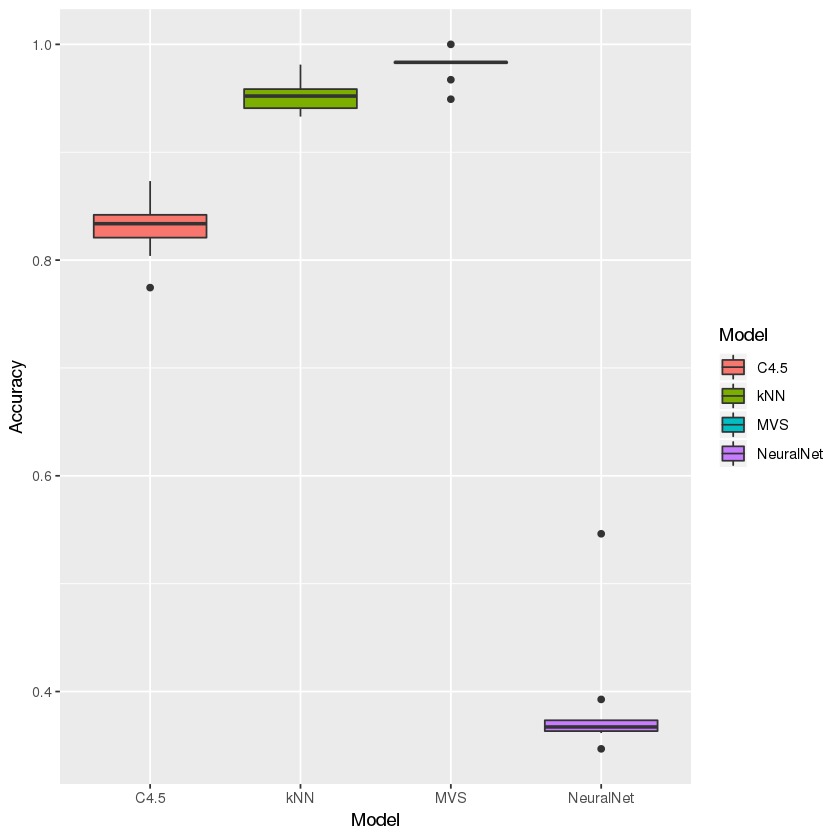

In [102]:
dfm.resamp <- data.frame(Accuracy = c(nn1LFit$resample$Accuracy, c4.5Fit$resample$Accuracy,
knnFitTraining$resample$Accuracy, svmLinealDuroFit$resample$Accuracy),
Model = rep(c('NeuralNet','C4.5','kNN', 'MVS'), each=10))
ggplot(dfm.resamp,aes(x=Model, y=Accuracy, fill=Model)) + geom_boxplot()

Se puede observar que para este problema claramente el mejor paradigma es el de máquinas vector soporte que obtiene una precisión muy cercana a 1, seguida de vecinos más cercanos, que pese a tener una precisión un poco inferior presenta más estabilidad. 

In [132]:
summary(tcga.filtered)

   gene_12382       gene_8057        gene_3787        gene_2160     
 Min.   :0.0000   Min.   : 6.722   Min.   : 8.367   Min.   : 6.114  
 1st Qu.:0.0000   1st Qu.: 8.656   1st Qu.: 9.473   1st Qu.: 8.053  
 Median :0.0000   Median : 8.953   Median : 9.718   Median : 8.398  
 Mean   :0.0132   Mean   : 8.924   Mean   : 9.727   Mean   : 8.374  
 3rd Qu.:0.0000   3rd Qu.: 9.206   3rd Qu.: 9.974   3rd Qu.: 8.697  
 Max.   :4.7283   Max.   :10.568   Max.   :11.674   Max.   :10.022  
   gene_8570       gene_4382       gene_17560       gene_14235     
 Min.   :0.000   Min.   :0.000   Min.   : 0.000   Min.   :0.00000  
 1st Qu.:2.455   1st Qu.:5.224   1st Qu.: 1.142   1st Qu.:0.00000  
 Median :3.837   Median :5.850   Median : 1.782   Median :0.00000  
 Mean   :3.856   Mean   :5.805   Mean   : 2.402   Mean   :0.06822  
 3rd Qu.:5.233   3rd Qu.:6.489   3rd Qu.: 2.767   3rd Qu.:0.00000  
 Max.   :8.658   Max.   :8.857   Max.   :14.091   Max.   :4.45047  
   gene_13011       gene_15132      gene_

Using Class as id variables


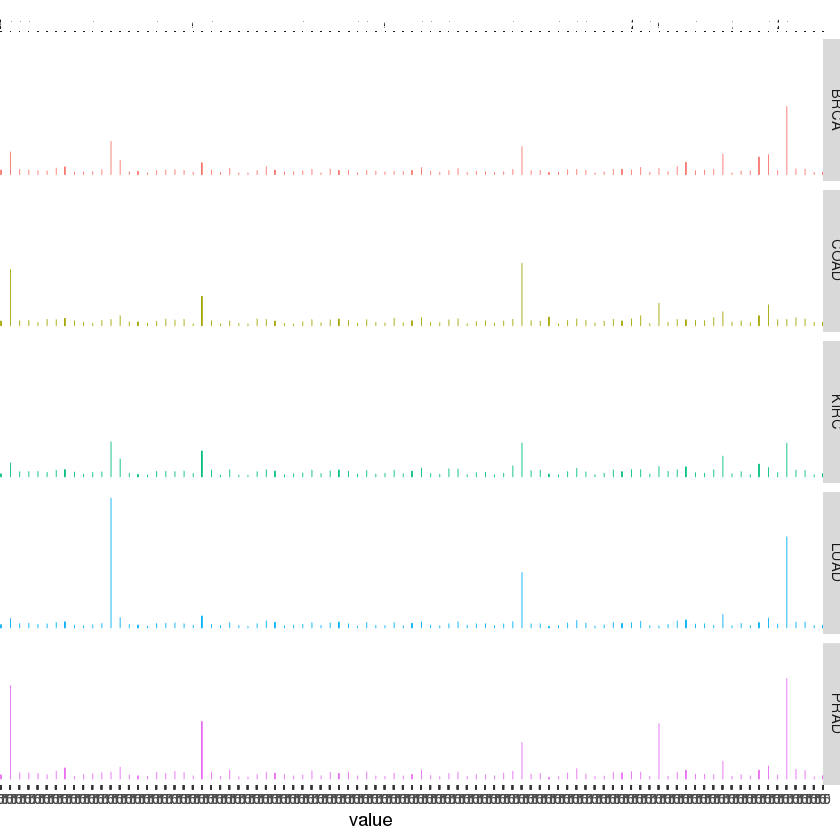

In [142]:
library(reshape2)
ggplot(melt(tcga.filtered) , aes(x=value,color=Class)) + geom_density()+facet_grid(Class~variable)

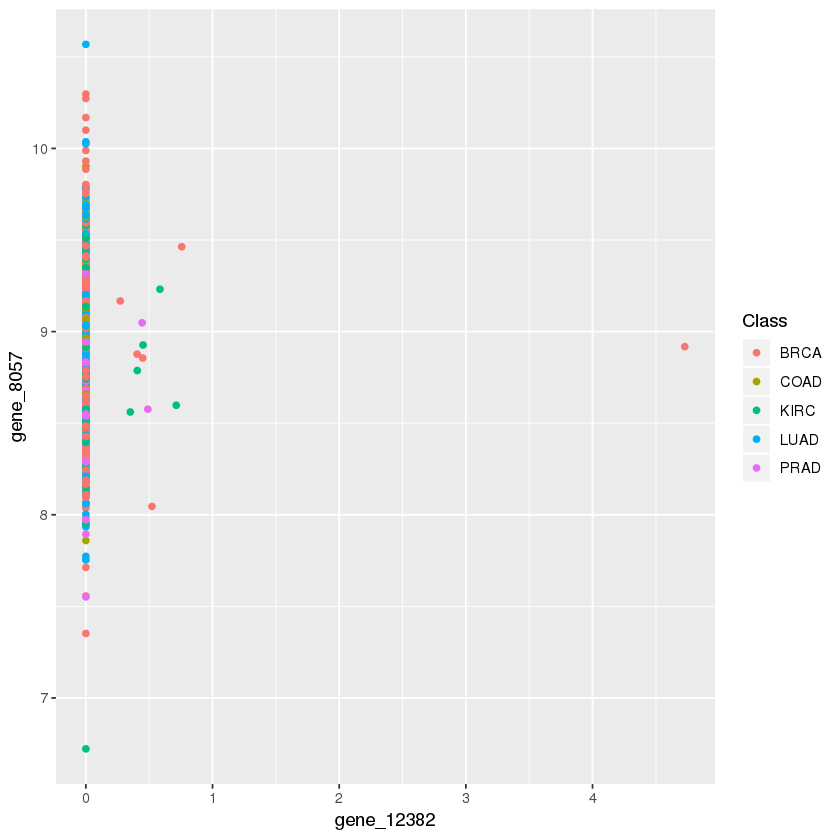

In [143]:
ggplot(tcga.filtered , aes(x=gene_12382,y=gene_8057,color=Class)) + geom_point()

In [ ]:
makePairs <- function(data,classIndex){ dfm <- NULL
for(i in 1:ncol(data)){
    if(i==classIndex)
      next
for(j in 1:ncol(data)){ if(j==classIndex)
        next
      if(i==j)
        next
      dfm <- rbind(dfm,data.frame(x=data[,i],y=data[,j], Var1=colnames(data)[i],
                                  Var2=colnames(data)[j],class=data[,classIndex]))
          }
    }
    dfm$Var2 <- relevel(dfm$Var2,levels(dfm$Var1)[1])
    dfm 
}
dataToPlot <- makePairs(tcga.filtered,8)
ggplot(dataToPlot, aes_string(x = "x", y = "y")) + 
        facet_grid(Var1 ~ Var2, scales = "free") + 
        geom_point(aes(colour=class), alpha=0.6)